In [51]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Dataset**

In [24]:
df = pd.read_csv("training_titanic_x_y_train.csv")

**Dropping unwanted columns**

In [25]:
df.drop('Name',inplace=True,axis=1)
df.drop('Embarked',inplace=True,axis=1)
df.drop('Ticket',inplace=True,axis=1)
df.drop('Cabin',inplace=True,axis=1)

In [26]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2,female,29.0,1,0,26.000,1
1,3,male,NaN,0,0,8.050,0
2,2,male,39.0,0,0,26.000,0
3,3,female,29.0,0,4,21.075,0
4,3,male,25.0,0,0,7.050,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Sex       668 non-null    object 
 2   Age       536 non-null    float64
 3   SibSp     668 non-null    int64  
 4   Parch     668 non-null    int64  
 5   Fare      668 non-null    float64
 6   Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 36.7+ KB


In [31]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

There are null values in age column, we need to impute that column.

<Axes: xlabel='Age'>

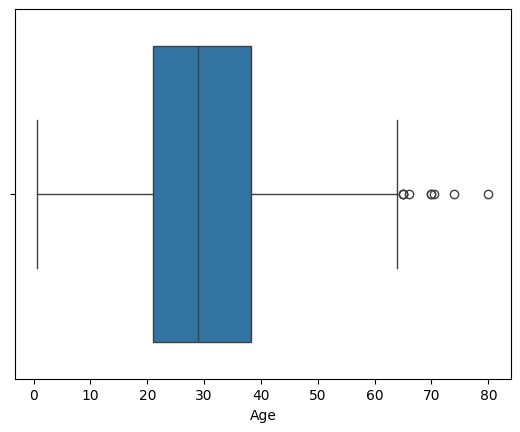

In [ ]:
sns.boxplot(x='Age', data=df)

We can see there are outlayers in the column age so we are choosing median value to impute that column.

In [30]:
df.Age = df.Age.fillna(df.Age.median())

**Categorical & Coding**

In [32]:
df.Sex.value_counts()

Sex
male      427
female    241
Name: count, dtype: int64

In [34]:
df.Sex = df.Sex.map(lambda x: 1 if x=='male' else 0)

In [35]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2,0,29.0,1,0,26.000,1
1,3,1,29.0,0,0,8.050,0
2,2,1,39.0,0,0,26.000,0
3,3,0,29.0,0,4,21.075,0
4,3,1,25.0,0,0,7.050,0


**Creating Train-Test split**

In [39]:
X= df.drop('Survived', axis= 1)

In [42]:
y = df.Survived

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47)

**Standardization of Data**

In [45]:
scaler = StandardScaler()

In [46]:
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
365,3,1,-0.046604,0,0,-0.147980
270,3,1,-0.046604,1,1,-0.345665
405,2,0,-0.688318,0,0,-0.451027
291,1,1,-0.207033,0,2,4.011424
439,1,0,1.076395,0,1,4.007816


In [47]:
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
483,3,1,0.274253,0,0,-0.508844
471,3,0,-0.046604,3,1,-0.118748
335,1,0,-0.046604,1,0,2.568804
168,3,1,-0.367461,1,0,-0.288958
411,3,1,-0.046604,2,0,-0.167961


**Training**

In [49]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

**Evaluation**

In [50]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [52]:
confusion_matrix = metrics.confusion_matrix(y_train,clf.predict(X_train))
print(confusion_matrix)

[[257  47]
 [ 59 138]]


In [53]:
confusion_matrix = metrics.confusion_matrix(y_test,clf.predict(X_test))
print(confusion_matrix)

[[75 20]
 [20 52]]


In [54]:
metrics.accuracy_score(y_test,clf.predict(X_test))

0.7604790419161677

In [55]:
metrics.accuracy_score(y_train,clf.predict(X_train))

0.7884231536926147

We can see that the model has achieved a 76% in test set and 78% in train set. The model performance is average but it has not over fitted.